In [2]:
#import tensorflow.keras
from extra_keras_datasets import stl10 # Using the keras extras library to easen up the loading of the stl-10 dataset
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras import models,regularizers
from tensorflow.keras import layers
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = stl10.load_data()

INFO:root:Loading dataset = stl-10


In [4]:
X_train.shape[1] #By printing the shape we see that there are 5000 samples, and that they are 96x96. 3 Also means that there are 3 channels. RGB

96

In [16]:
#X_test.shape #Checking how many test samples there are. There are 8000
#print(X_test[:1])
y_test.shape
print(y_test[:30])

[ 7  8  6  1  4  2  2  2  5  5  1  1  5  1  2  6  5 10  1  7  6  4  2  4
  3  7  6  6  3  8]


In [5]:
def plot_sample(X, y, i): # Using this function to figure out what labels the different pictures are
    plt.imshow(X[i])
    plt.xlabel(classes[y[i]])
    print(y[i])

In [6]:
classes = [ "", "airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"] # Using an "" in the beginning to be able to probe indexes directly from the target vector

7


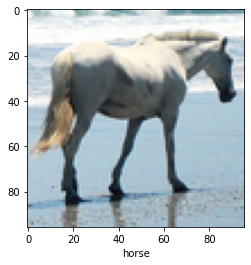

In [7]:
plot_sample(X_train, y_train, 17) # Doing some data exploration

In [8]:
# Normalizing the input into 0-1 range by dividing everything by 255
#X_train[0]/255
X_train = X_train / 255
X_test  = X_test  / 255
#print(X_test[0])

In [9]:
# Building an ANN. Task 1.1
model = models.Sequential([
    layers.Flatten(input_shape=(96,96,3)),
    layers.Dense(3500, activation='tanh'),
    layers.Dense(590, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

results = model.fit(X_train, y_train-1, validation_data=(X_test, y_test-1), epochs=10) # Didn't do anything with the batch size to make the training go a bit faster

Epoch 1/10
157/157 [==============================] - 63s 403ms/step - loss: 2.0574 - accuracy: 0.2479 - val_loss: 1.9915 - val_accuracy: 0.2491
Epoch 2/10
157/157 [==============================] - 62s 398ms/step - loss: 1.8931 - accuracy: 0.3071 - val_loss: 1.9054 - val_accuracy: 0.3029
Epoch 3/10
157/157 [==============================] - 63s 401ms/step - loss: 1.8318 - accuracy: 0.3316 - val_loss: 1.9192 - val_accuracy: 0.2941
Epoch 4/10
157/157 [==============================] - 59s 378ms/step - loss: 1.7914 - accuracy: 0.3588 - val_loss: 1.8126 - val_accuracy: 0.3224
Epoch 5/10
157/157 [==============================] - 57s 366ms/step - loss: 1.7536 - accuracy: 0.3600 - val_loss: 1.7798 - val_accuracy: 0.3381
Epoch 6/10
157/157 [==============================] - 57s 361ms/step - loss: 1.7050 - accuracy: 0.3910 - val_loss: 1.8663 - val_accuracy: 0.2916
Epoch 7/10
157/157 [==============================] - 58s 367ms/step - loss: 1.6923 - accuracy: 0.3929 - val_loss: 1.9730 - val_ac

In [18]:
print("Test-Accuracy:", np.mean(results.history["val_accuracy"])) # Test accuracy is 30%
losses = results.history['loss']
val_losses = results.history['val_loss']

Test-Accuracy: 0.3056999981403351


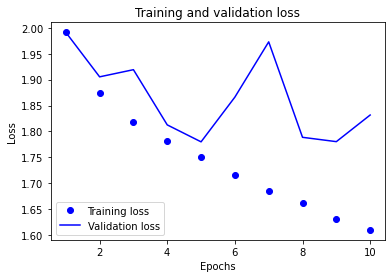

In [13]:
plt.figure()
history_dict = results.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# As we can see from this graph, we notice that the validation loss is bigger than the training loss. This could mean that our model is 
# overfitting.

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(elem) for elem in y_pred]

print("Classification report: \n", classification_report(y_test-1, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.39      0.48       800
           1       0.15      0.80      0.25       800
           2       0.63      0.41      0.50       800
           3       0.30      0.08      0.13       800
           4       0.38      0.06      0.11       800
           5       0.25      0.10      0.14       800
           6       0.55      0.12      0.20       800
           7       0.42      0.01      0.02       800
           8       0.43      0.74      0.54       800
           9       0.51      0.27      0.35       800

    accuracy                           0.30      8000
   macro avg       0.43      0.30      0.27      8000
weighted avg       0.43      0.30      0.27      8000



In [17]:
# As we can see from the classification report, the model performs better and worse on specific classes
print(y_train)

[2 6 2 ... 2 8 6]


In [29]:
# 1.2 Implementing the convolutional neural network
modelCon = models.Sequential([
    #Convolutional
    layers.Conv2D(filters=20, kernel_size=(6,6), activation='relu', input_shape=(96,96,3)),
    layers.MaxPooling2D((2,2)), #Using pooling to down-sample input representation

    layers.Conv2D(filters=44, kernel_size=(6,6), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
modelCon.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
results = modelCon.fit(X_train, y_train-1, validation_data=(X_test, y_test-1), epochs=10) #Don't do anything with batch size here, just to make it train faster on my computer

Epoch 1/10
157/157 [==============================] - 55s 346ms/step - loss: 2.1095 - accuracy: 0.1921 - val_loss: 1.6699 - val_accuracy: 0.3627
Epoch 2/10
157/157 [==============================] - 46s 294ms/step - loss: 1.4874 - accuracy: 0.4438 - val_loss: 1.5019 - val_accuracy: 0.4456
Epoch 3/10
157/157 [==============================] - 50s 319ms/step - loss: 1.2618 - accuracy: 0.5382 - val_loss: 1.3885 - val_accuracy: 0.4960
Epoch 4/10
157/157 [==============================] - 53s 336ms/step - loss: 1.0120 - accuracy: 0.6319 - val_loss: 1.3925 - val_accuracy: 0.5050
Epoch 5/10
157/157 [==============================] - 51s 323ms/step - loss: 0.7824 - accuracy: 0.7161 - val_loss: 1.4981 - val_accuracy: 0.5075
Epoch 6/10
157/157 [==============================] - 50s 318ms/step - loss: 0.5650 - accuracy: 0.8076 - val_loss: 1.6213 - val_accuracy: 0.5132
Epoch 7/10
157/157 [==============================] - 49s 315ms/step - loss: 0.3542 - accuracy: 0.8875 - val_loss: 1.9417 - val_ac

In [33]:
print("Test-Accuracy:", np.mean(results.history["val_accuracy"])) # Test accuracy is 46% this time around. Could possibly be better with some tweaks, but seeing as it takes a lot of time to train on my computer, I will leave it at this
# It also performed better than the previous models, this makes sense as convolutional networks are better at image recognition
losses = results.history['loss']
val_losses = results.history['val_loss']

Test-Accuracy: 0.48461249470710754


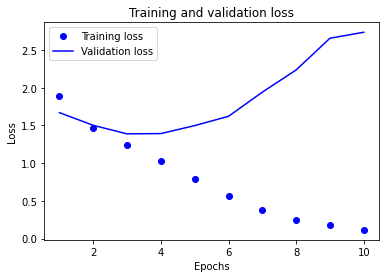

In [34]:
plt.figure()
history_dict = results.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Here we also see that the validation loss is higher than the training loss, probably overfitting

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = modelCon.predict(X_test)
y_pred_classes = [np.argmax(elem) for elem in y_pred]

print("Classification report: \n", classification_report(y_test-1, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.58      0.84      0.69       800
           1       0.44      0.37      0.40       800
           2       0.70      0.74      0.72       800
           3       0.34      0.42      0.38       800
           4       0.46      0.46      0.46       800
           5       0.30      0.34      0.32       800
           6       0.52      0.51      0.51       800
           7       0.40      0.33      0.36       800
           8       0.70      0.59      0.64       800
           9       0.65      0.43      0.52       800

    accuracy                           0.50      8000
   macro avg       0.51      0.50      0.50      8000
weighted avg       0.51      0.50      0.50      8000



In [ ]:
# From the classification report we see that this model with the convolutional layers performed slightly better than the previous model, which makes perfect sense seeing as that convolutional networks are much better at image recognition.